NAMA : BAGAS KRISNANDA BAHARSYAH
NIM 22.11.4890
KELAS : INFORMATIKA 06

import Library

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib

Import Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
file_path = '/content/drive/MyDrive/Big Data dan Data Mining/mentalhealth_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2


Profile Dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Gender                      1000 non-null   object 
 2   Age                         1000 non-null   int64  
 3   Course                      1000 non-null   object 
 4   YearOfStudy                 1000 non-null   object 
 5   CGPA                        1000 non-null   float64
 6   Depression                  1000 non-null   int64  
 7   Anxiety                     1000 non-null   int64  
 8   PanicAttack                 1000 non-null   int64  
 9   SpecialistTreatment         1000 non-null   int64  
 10  SymptomFrequency_Last7Days  1000 non-null   int64  
 11  HasMentalHealthSupport      1000 non-null   int64  
 12  SleepQuality                1000 non-null   int64  
 13  StudyStressLevel            1000 n

In [15]:
print("Dimensi Dataset (Baris, Kolom):", df.shape)

Dimensi Dataset (Baris, Kolom): (1000, 16)


In [17]:
df.dtypes

,0
Timestamp,object
Gender,object
Age,int64
Course,object
YearOfStudy,object
CGPA,float64
Depression,int64
Anxiety,int64
PanicAttack,int64
SpecialistTreatment,int64


In [18]:
df.describe()

,Age,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.402000,3.122530,0.483000,0.474000,0.458000,0.067000,3.4980,0.067000,2.983000,3.045000,9.746000,3.055000
std,2.373611,0.810961,0.499961,0.499573,0.498482,0.250147,2.3081,0.250147,1.417999,1.417386,5.651497,1.422673
min,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,2.250000,0.000000,0.000000,0.000000,0.000000,1.7500,0.000000,2.000000,2.000000,5.000000,2.000000
50%,21.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.0000,0.000000,3.000000,3.000000,9.000000,3.000000
75%,24.000000,4.000000,1.000000,1.000000,1.000000,0.000000,6.0000,0.000000,4.000000,4.000000,15.000000,4.000000
max,25.000000,4.000000,1.000000,1.000000,1.000000,1.000000,7.0000,1.000000,5.000000,5.000000,19.000000,5.000000


PREPROCESSING DATA

1. Memeriksa nilai null yang hilang

In [20]:
print("Jumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())

Jumlah Nilai Hilang per Kolom:
Timestamp                     0
Gender                        0
Age                           0
Course                        0
YearOfStudy                   0
CGPA                          0
Depression                    0
Anxiety                       0
PanicAttack                   0
SpecialistTreatment           0
SymptomFrequency_Last7Days    0
HasMentalHealthSupport        0
SleepQuality                  0
StudyStressLevel              0
StudyHoursPerWeek             0
AcademicEngagement            0
dtype: int64


2. Encoding Variabel Kategorikal

In [21]:
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

3. Penskalaan Fitur

In [22]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


4. Membagi Data menjadi Training dan Testing Set

In [25]:
# Membagi dataset menjadi data training dan data testing
X = df.drop('Depression', axis=1)
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
print(df.head())

   Timestamp    Gender       Age    Course  YearOfStudy      CGPA  Depression  \
0  -1.995574 -0.561951  1.095082 -0.668681    -0.574118 -0.916076    1.034598   
1  -1.995574 -0.561951 -1.433976 -0.668681    -0.574118  1.082554   -0.966559   
2  -1.995574 -0.561951  1.516592 -0.668681    -0.574118  0.687763   -0.966559   
3  -1.995574 -0.561951 -1.433976 -0.021222     2.223045  1.082554   -0.966559   
4  -1.995574 -0.561951 -0.590957 -0.021222     2.223045 -1.384890    1.034598   

    Anxiety  PanicAttack  SpecialistTreatment  SymptomFrequency_Last7Days  \
0 -0.949284    -0.919249            -0.267976                    0.651077   
1  1.053425    -0.919249            -0.267976                   -1.516291   
2 -0.949284     1.087845            -0.267976                   -0.215870   
3 -0.949284    -0.919249            -0.267976                   -0.215870   
4  1.053425    -0.919249            -0.267976                   -1.516291   

   HasMentalHealthSupport  SleepQuality  StudyStre

Exploratory Data Analysis

In [27]:
# 1. Statistik Deskriptif
print("Statistik Deskriptif:")
print(df.describe(include='all'))

Statistik Deskriptif:
         Timestamp        Gender           Age        Course   YearOfStudy  \
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean      0.000000 -2.842171e-17 -4.343192e-16 -1.492140e-16 -9.814372e-17   
std       1.000500  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min      -1.995574 -5.619515e-01 -1.433976e+00 -1.244200e+00 -1.972699e+00   
25%      -0.194108 -5.619515e-01 -1.012467e+00 -9.564402e-01 -5.741176e-01   
50%       0.256259 -5.619515e-01 -1.694469e-01 -2.122225e-02  1.251730e-01   
75%       0.706625 -5.619515e-01  1.095082e+00  7.701160e-01  1.251730e-01   
max       1.382175  1.779513e+00  1.516592e+00  2.208913e+00  2.223045e+00   

               CGPA    Depression       Anxiety   PanicAttack  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   2.788880e-16  7.460699e-17  2.309264e-17  2.842171e-17   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -1.384890

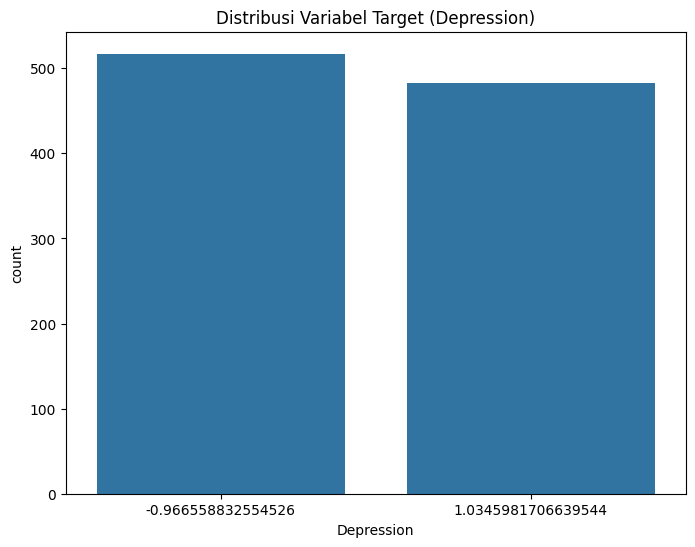

In [29]:
# 2. Distribusi Variabel Target
plt.figure(figsize=(8, 6))
sns.countplot(x='Depression', data=df)
plt.title('Distribusi Variabel Target (Depression)')
plt.show()

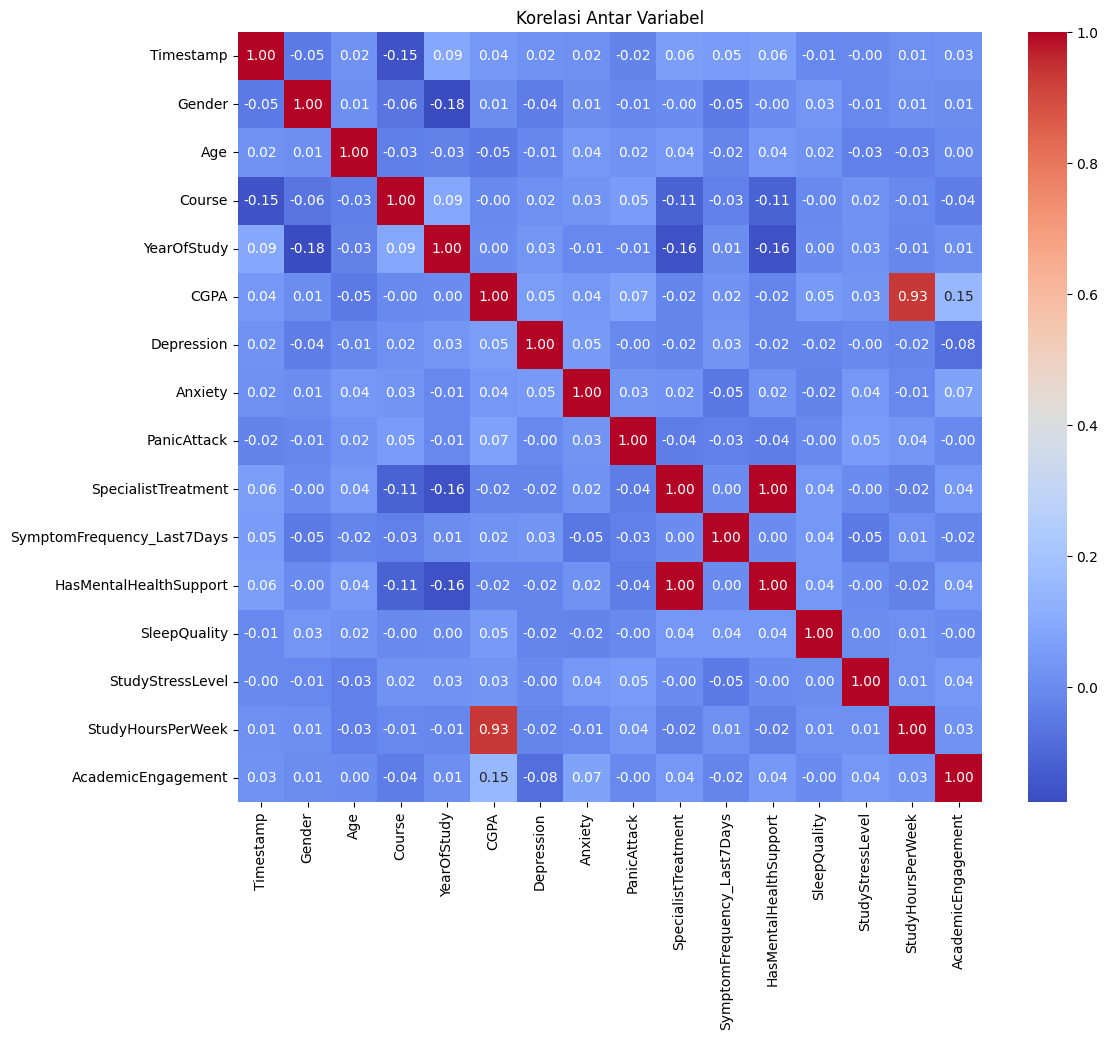

In [31]:
# 3. Korelasi antar Variabel
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel')
plt.show()

In [32]:
# 4. Analisis Variabel Kategorikal
categorical_cols = df.select_dtypes(include=['object', 'int64']).columns # Memeriksa kolom kategorikal
for col in categorical_cols:
    if col != 'Depression': # Kecuali kolom target
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='Depression', data=df)
        plt.title(f'Distribusi {col} berdasaran Depression')
        plt.xticks(rotation=45, ha='right') # Rotasi label sumbu x untuk tampilan yang lebih baik
        plt.show()


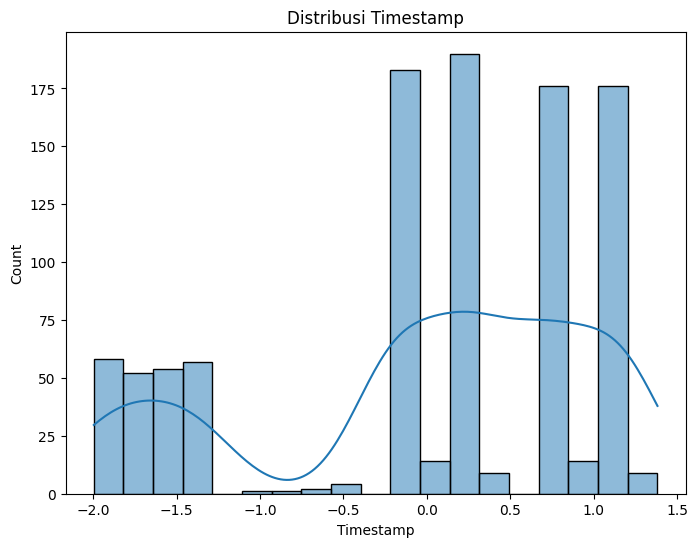

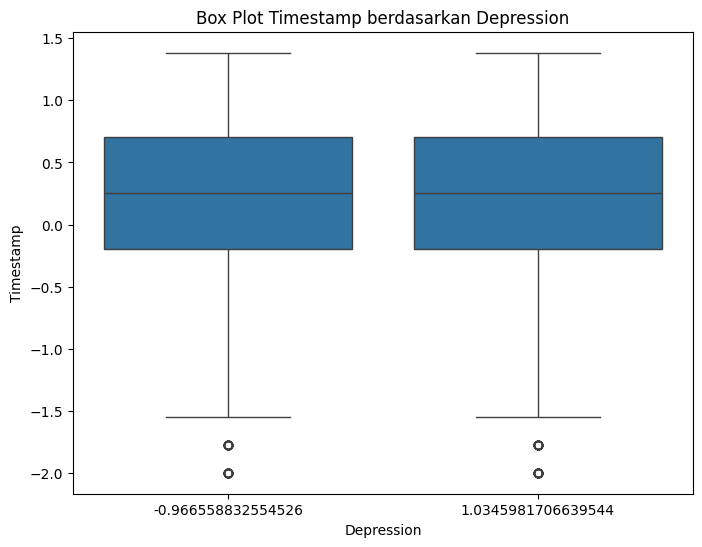

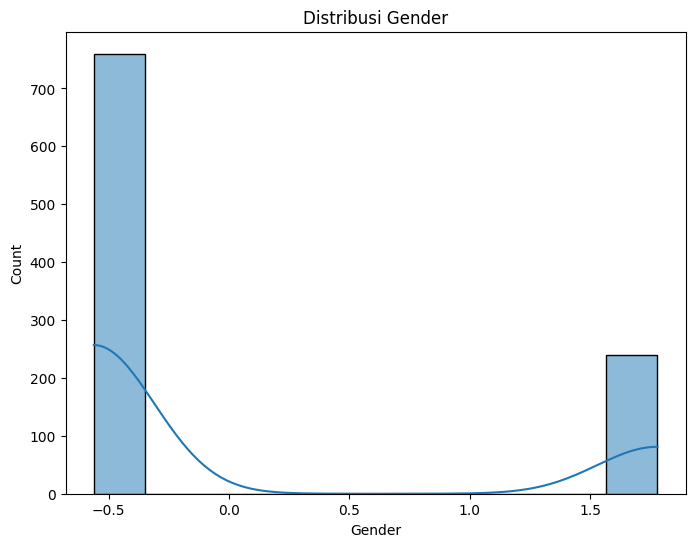

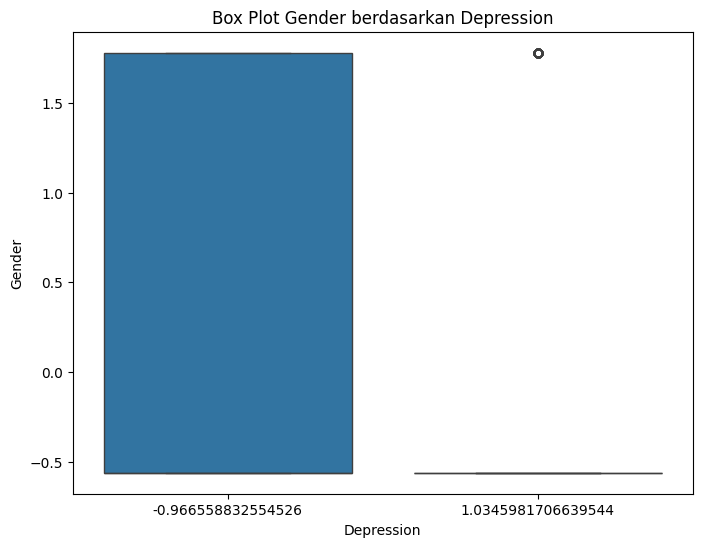

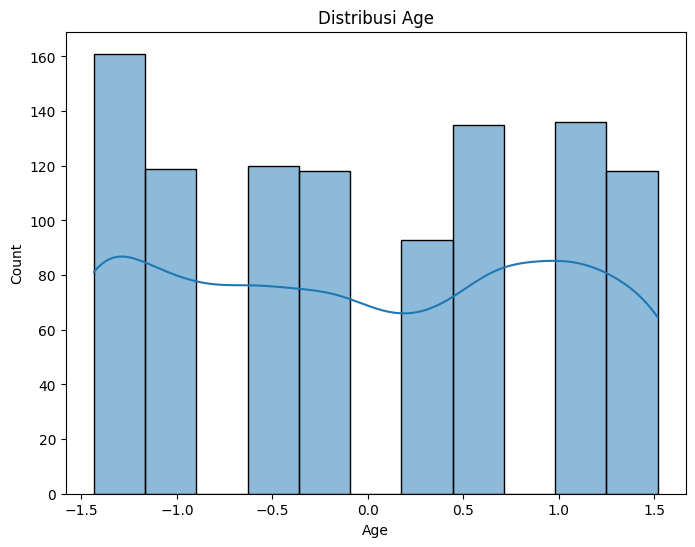

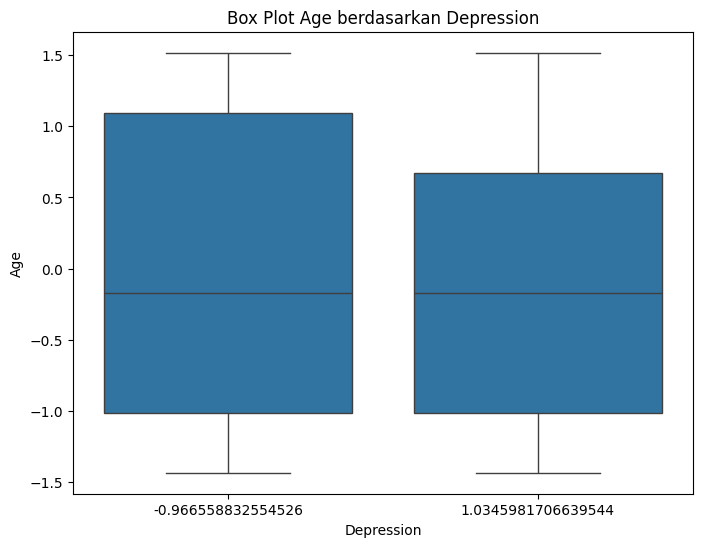

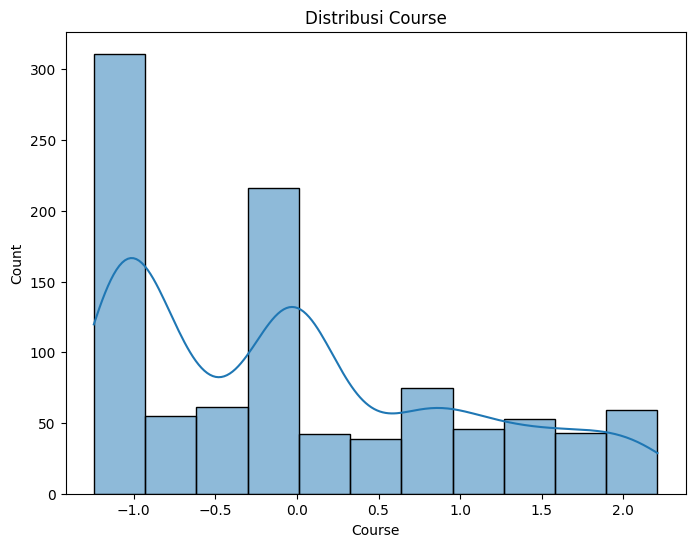

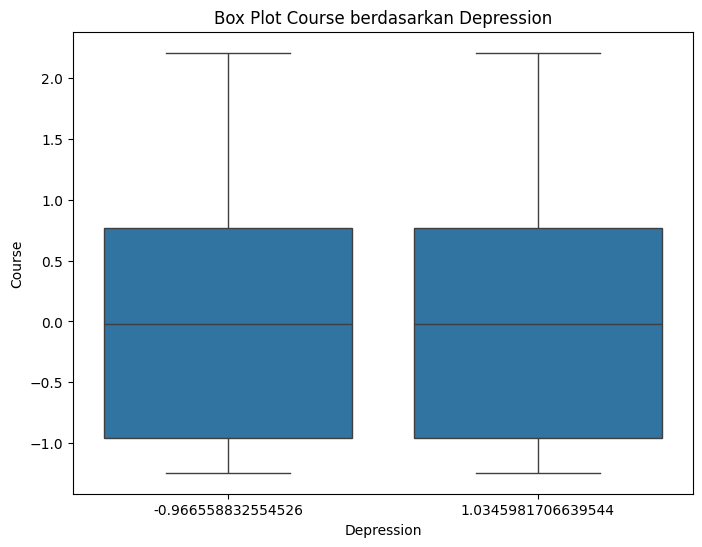

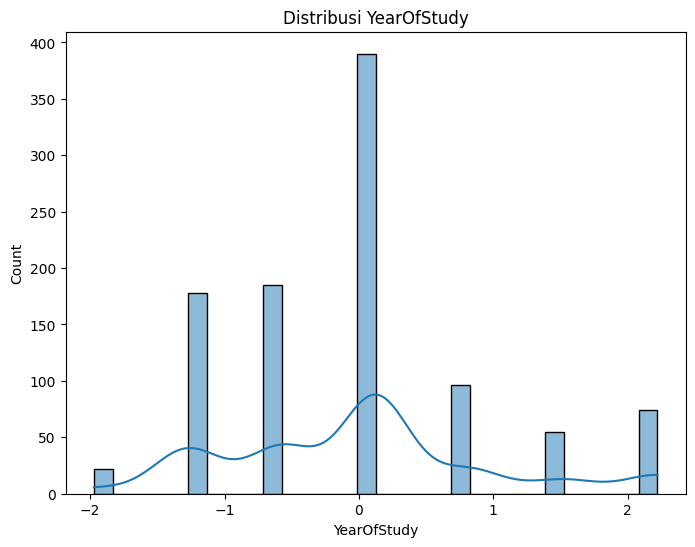

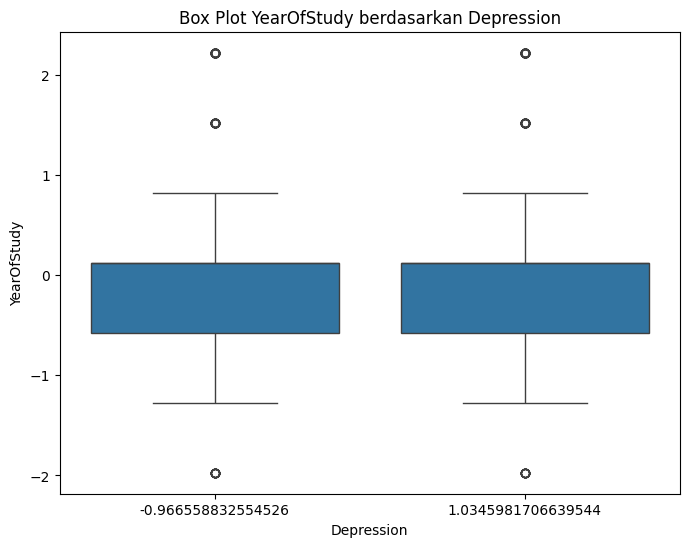

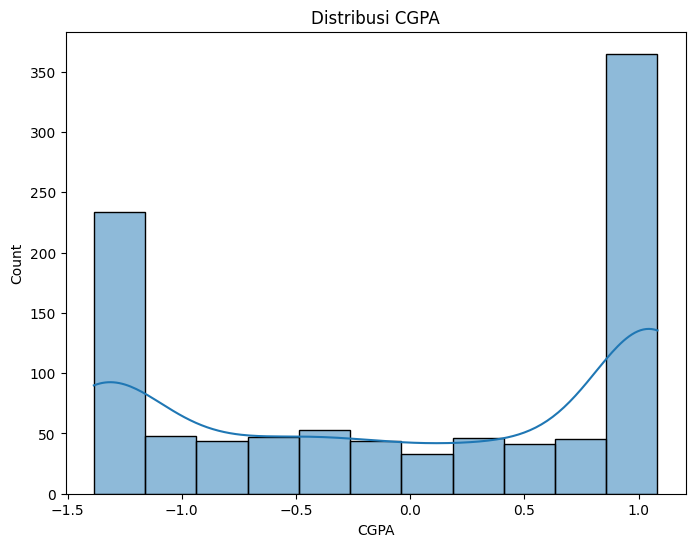

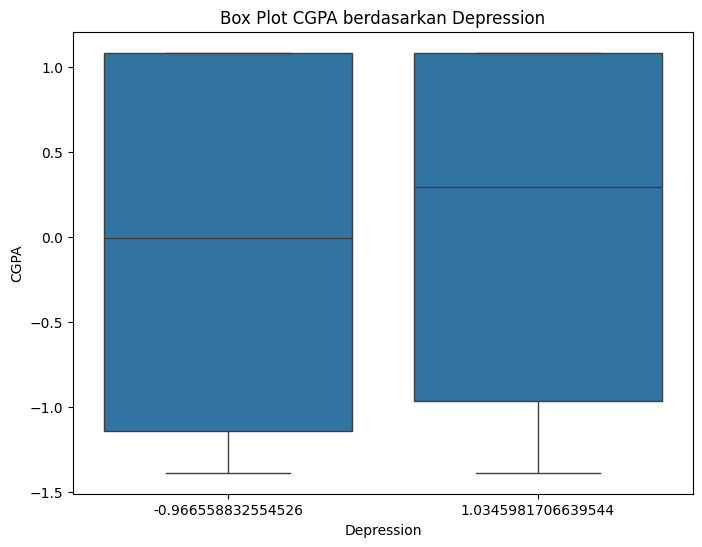

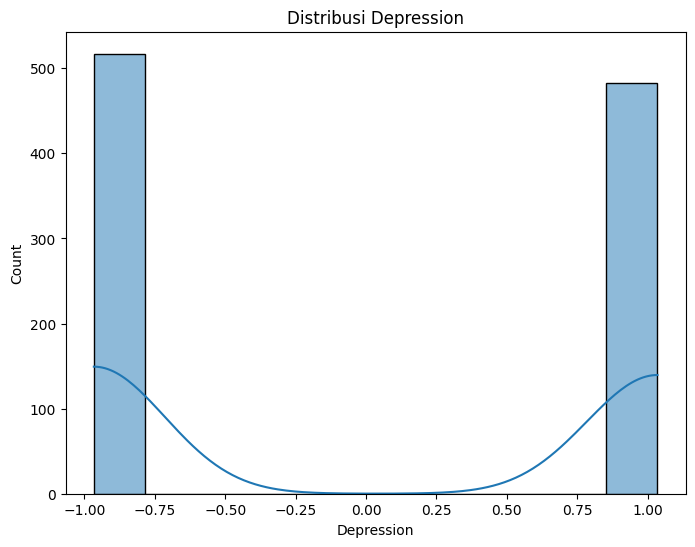

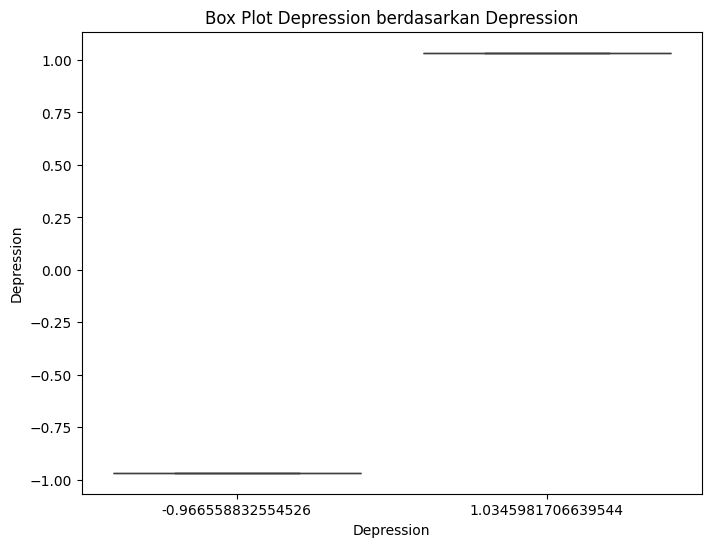

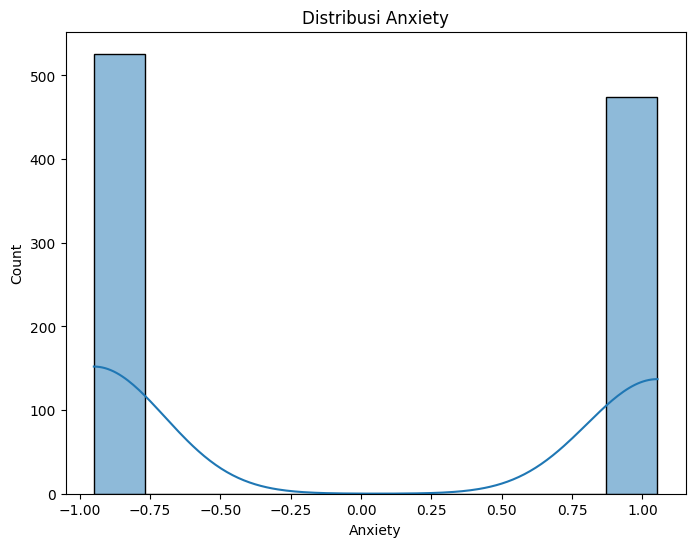

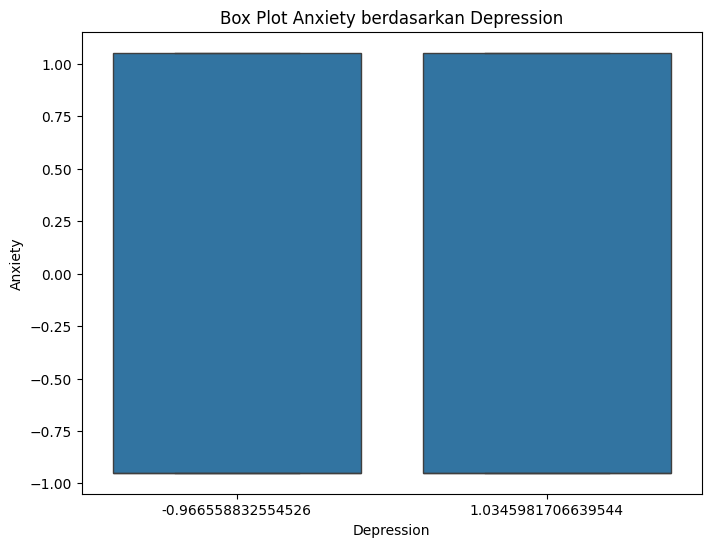

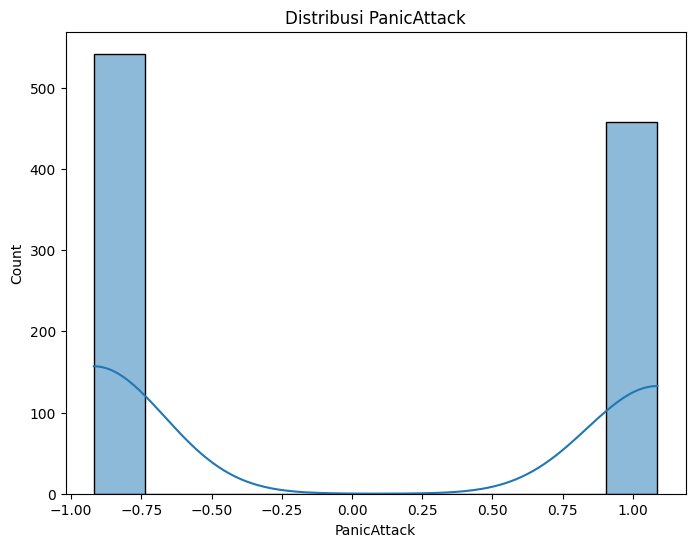

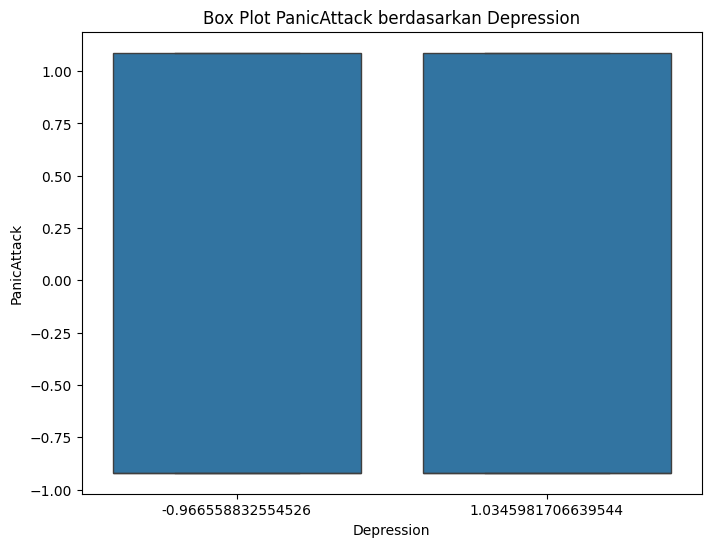

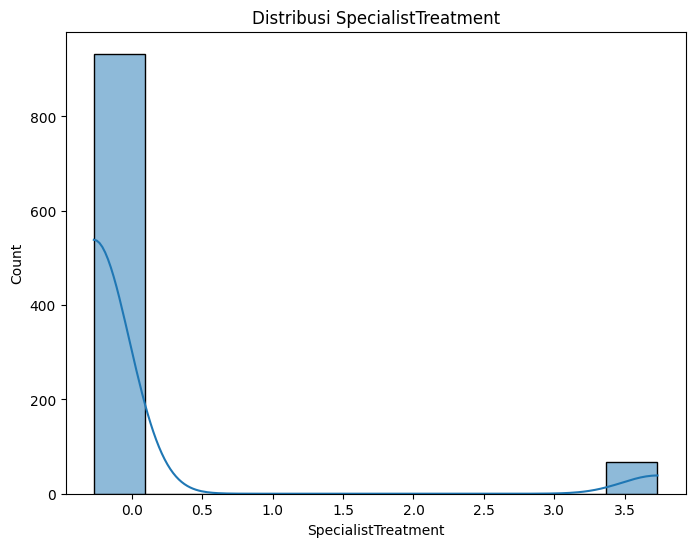

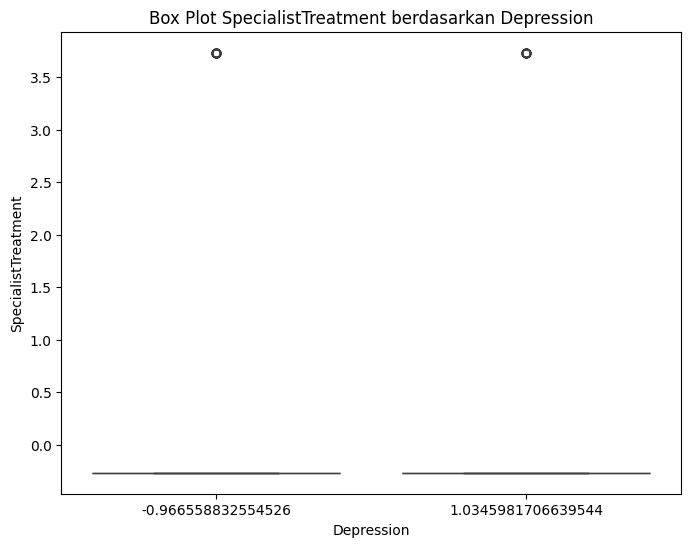

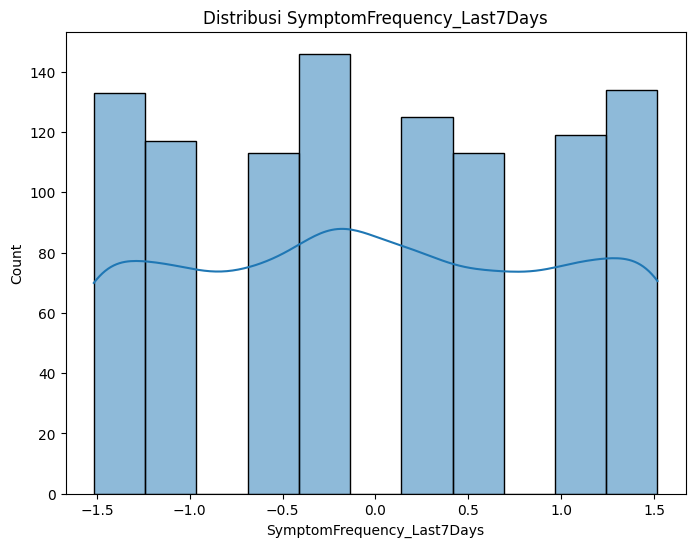

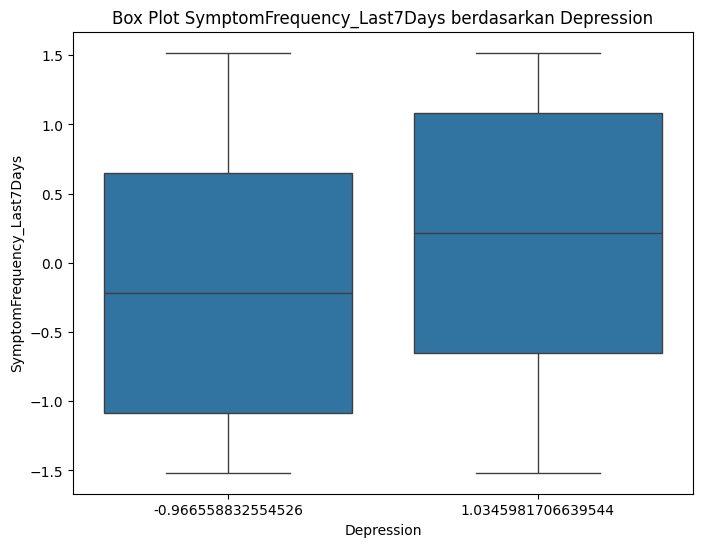

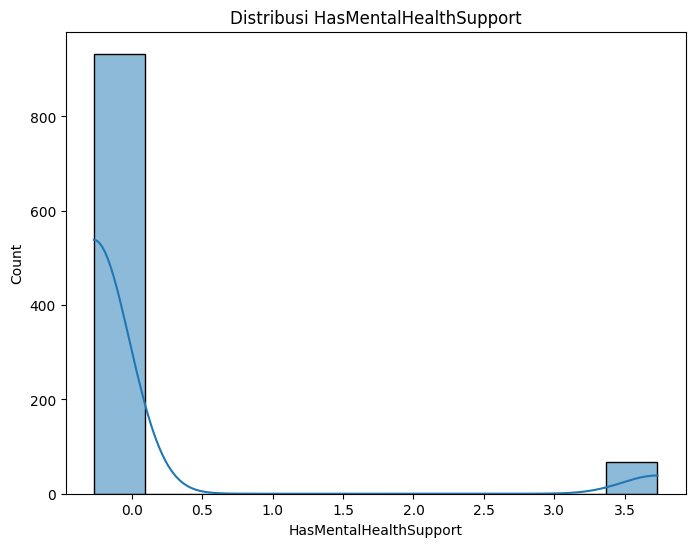

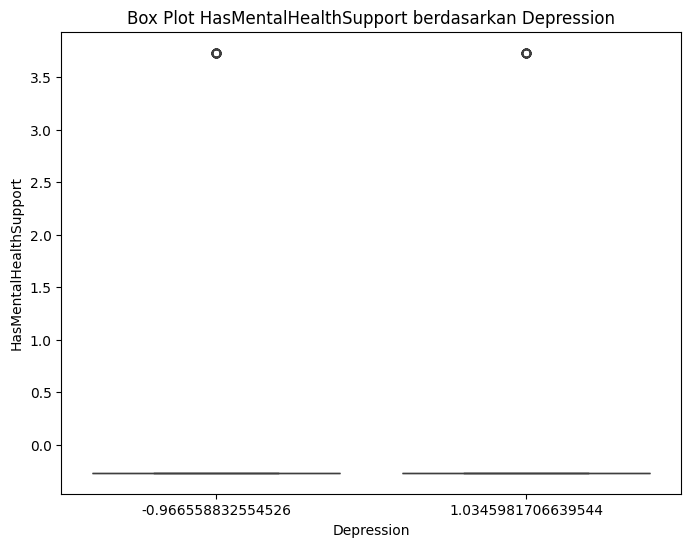

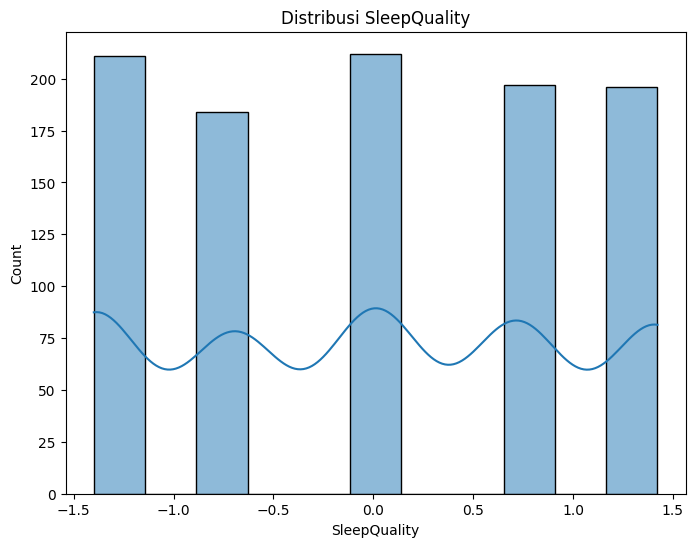

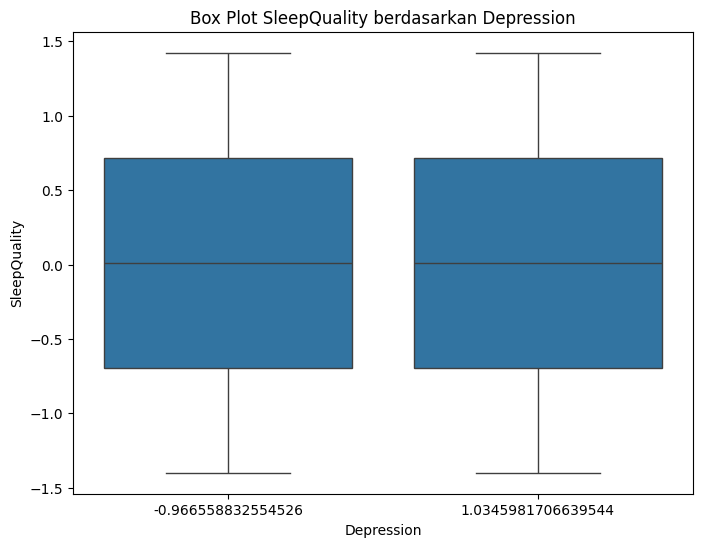

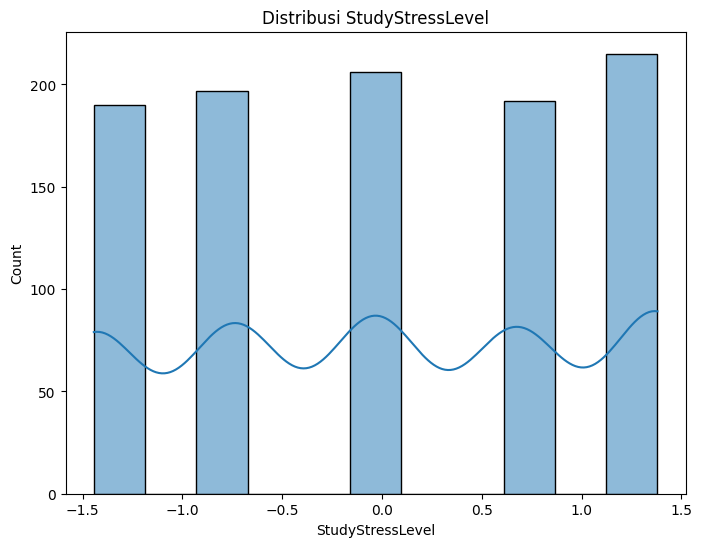

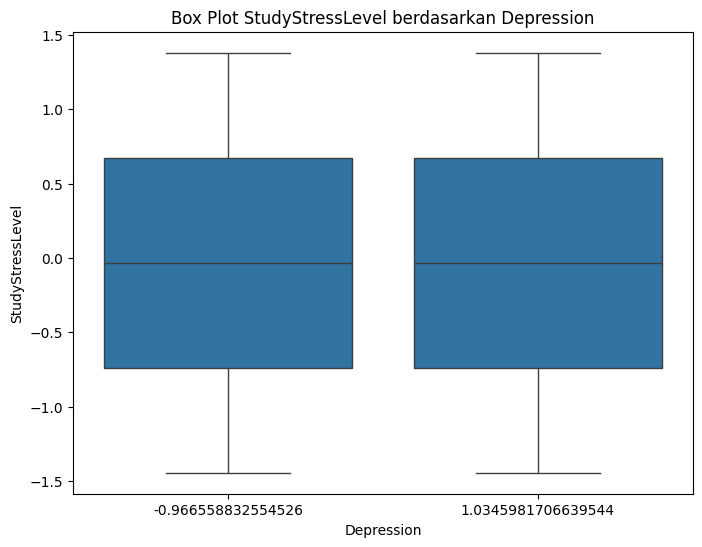

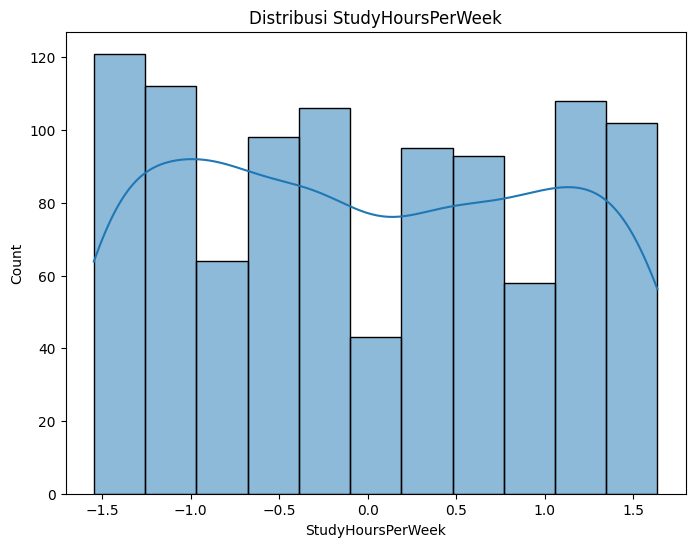

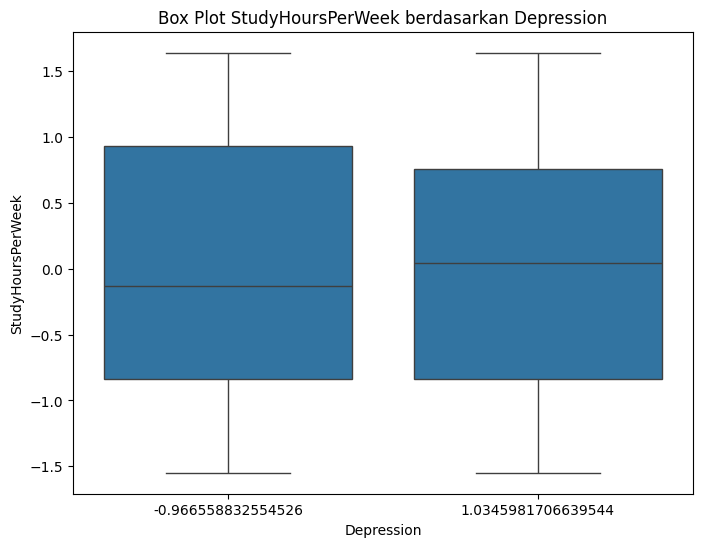

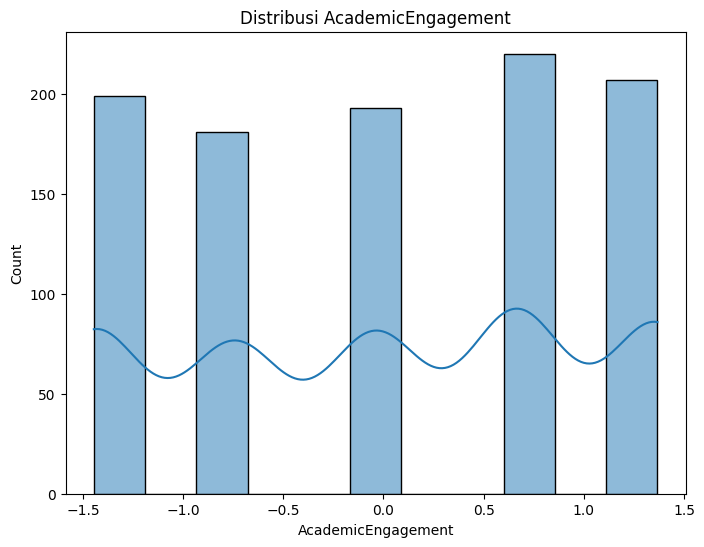

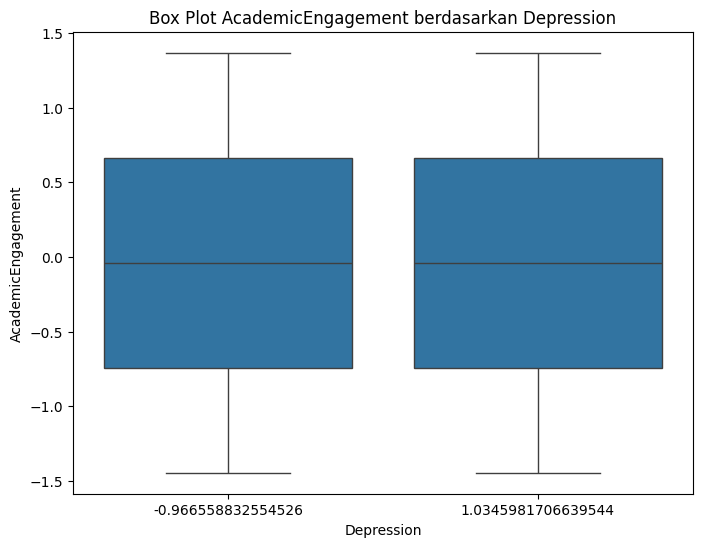

In [33]:
# 5. Analisis Variabel Numerik (jika ada)
numerical_cols = df.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Depression', y=col, data=df)
    plt.title(f'Box Plot {col} berdasarkan Depression')
    plt.show()

Seleksi Fitur

In [44]:
# 1. Seleksi Fitur dengan RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# 2. Mendapatkan pentingnya fitur dari model
importances = model_rf.feature_importances_

# 3. Menyusun DataFrame untuk menampilkan fitur dan tingkat kepentingannya
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 4. Menampilkan 10 fitur teratas
feature_importance.head(10)

,Feature,Importance
3,Course,0.130639
13,StudyHoursPerWeek,0.125445
5,CGPA,0.102925
9,SymptomFrequency_Last7Days,0.099957
2,Age,0.094583
0,Timestamp,0.092986
14,AcademicEngagement,0.073503
4,YearOfStudy,0.065877
12,StudyStressLevel,0.065872
11,SleepQuality,0.065410


Modeling

In [36]:
# 1. Modeling dengan RandomForestClassifier
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# 2. Menyimpan model yang telah dilatih
joblib.dump(model_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

Evaluasi Model

R-squared: -0.06717871787178709
Mean Squared Error: 1.0683069628490538


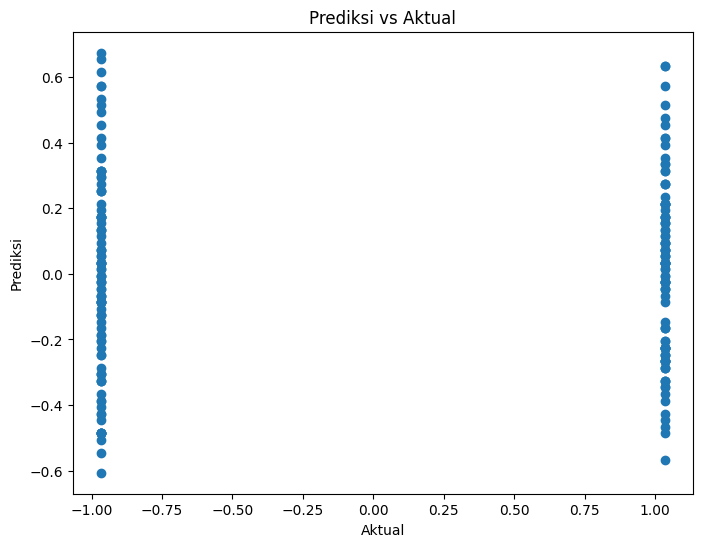

In [45]:
# 1. Prediksi pada data uji
y_pred = model_rf.predict(X_test)

# Karena ini adalah regresi, kita tidak perlu mengkonversi ke kelas
# y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]  # Hapus atau komentari baris ini


# 2. Evaluasi model
# Gunakan metrik evaluasi untuk regresi, seperti R-squared atau MSE
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Anda juga dapat memvisualisasikan hasil prediksi vs aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Aktual')
plt.show()